In [3]:
import modules.import_data as import_data
import modules.natural_language_treatment as nlt
from swifter import set_defaults
import importlib
from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import euclidean_distances
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pickle
import scipy
import numpy as np
%matplotlib inline
importlib.reload(nlt)
importlib.reload(import_data)
set_defaults(
    npartitions=30,
    dask_threshold=1,
    scheduler="threads",
    progress_bar=True,
    progress_bar_desc=False,
    allow_dask_on_strings=True,
    force_parallel=True,
)

On récupère l'ensemble des séries contenus dans notre base de donnée

In [4]:
df_paths_episodes = import_data.get_df_paths_episodes()
df_paths_episodes

,serie,season,episode_number,episode_name,path
0,Lost,01,1,Pilot_(1),data/transcripts/1___Lost/01/01__Pilot_(1).txt
1,Lost,01,2,Pilot_(2),data/transcripts/1___Lost/01/02__Pilot_(2).txt
2,Lost,01,3,Tabula_rasa,data/transcripts/1___Lost/01/03__Tabula_rasa.txt
3,Lost,01,4,Walkabout,data/transcripts/1___Lost/01/04__Walkabout.txt
4,Lost,01,5,White_rabbit,data/transcripts/1___Lost/01/05__White_rabbit.txt
...,...,...,...,...,...
81817,Mind_of_a_Chef,04,3,Rome,data/transcripts/5480___Mind_of_a_Chef/04/03__...
81818,Mind_of_a_Chef,04,4,Hunger,data/transcripts/5480___Mind_of_a_Chef/04/04__...
81819,Mind_of_a_Chef,04,5,Past,data/transcripts/5480___Mind_of_a_Chef/04/05__...
81820,Mind_of_a_Chef,04,6,Hustle,data/transcripts/5480___Mind_of_a_Chef/04/06__...


## Pre-processing

On tokenize et lemmatize nos épisodes

In [ ]:
nlt.tokenize_and_lemmatize_df_path_episodes_and_save(df_paths_episodes)

In [5]:
df_paths_episodes

,serie,season,episode_number,episode_name,path
0,Lost,01,1,Pilot_(1),data/transcripts/1___Lost/01/01__Pilot_(1).txt
1,Lost,01,2,Pilot_(2),data/transcripts/1___Lost/01/02__Pilot_(2).txt
2,Lost,01,3,Tabula_rasa,data/transcripts/1___Lost/01/03__Tabula_rasa.txt
3,Lost,01,4,Walkabout,data/transcripts/1___Lost/01/04__Walkabout.txt
4,Lost,01,5,White_rabbit,data/transcripts/1___Lost/01/05__White_rabbit.txt
...,...,...,...,...,...
81817,Mind_of_a_Chef,04,3,Rome,data/transcripts/5480___Mind_of_a_Chef/04/03__...
81818,Mind_of_a_Chef,04,4,Hunger,data/transcripts/5480___Mind_of_a_Chef/04/04__...
81819,Mind_of_a_Chef,04,5,Past,data/transcripts/5480___Mind_of_a_Chef/04/05__...
81820,Mind_of_a_Chef,04,6,Hustle,data/transcripts/5480___Mind_of_a_Chef/04/06__...


In [6]:
df_paths_episodes['path_lemmatized'] = df_paths_episodes['path'].swifter.apply(lambda x: x.replace('data/transcripts', 'data/lemmatized'))
df_paths_episodes

Dask Apply:   0%|          | 0/30 [00:00<?, ?it/s]

,serie,season,episode_number,episode_name,path,path_lemmatized
0,Lost,01,1,Pilot_(1),data/transcripts/1___Lost/01/01__Pilot_(1).txt,data/lemmatized/1___Lost/01/01__Pilot_(1).txt
1,Lost,01,2,Pilot_(2),data/transcripts/1___Lost/01/02__Pilot_(2).txt,data/lemmatized/1___Lost/01/02__Pilot_(2).txt
2,Lost,01,3,Tabula_rasa,data/transcripts/1___Lost/01/03__Tabula_rasa.txt,data/lemmatized/1___Lost/01/03__Tabula_rasa.txt
3,Lost,01,4,Walkabout,data/transcripts/1___Lost/01/04__Walkabout.txt,data/lemmatized/1___Lost/01/04__Walkabout.txt
4,Lost,01,5,White_rabbit,data/transcripts/1___Lost/01/05__White_rabbit.txt,data/lemmatized/1___Lost/01/05__White_rabbit.txt
...,...,...,...,...,...,...
81817,Mind_of_a_Chef,04,3,Rome,data/transcripts/5480___Mind_of_a_Chef/04/03__...,data/lemmatized/5480___Mind_of_a_Chef/04/03__R...
81818,Mind_of_a_Chef,04,4,Hunger,data/transcripts/5480___Mind_of_a_Chef/04/04__...,data/lemmatized/5480___Mind_of_a_Chef/04/04__H...
81819,Mind_of_a_Chef,04,5,Past,data/transcripts/5480___Mind_of_a_Chef/04/05__...,data/lemmatized/5480___Mind_of_a_Chef/04/05__P...
81820,Mind_of_a_Chef,04,6,Hustle,data/transcripts/5480___Mind_of_a_Chef/04/06__...,data/lemmatized/5480___Mind_of_a_Chef/04/06__H...


## Visualizing Data

On va maintenant chercher à déterminer le vocabulaire de notre corpus, pour cela on va utiliser la fonction CountVectorizer de sklearn

In [101]:
vectorizer = CountVectorizer(strip_accents='unicode', stop_words='english')

In [102]:
texts = []
for i in tqdm(range(len(df_paths_episodes))):
    path = df_paths_episodes.iloc[i]['path_lemmatized']
    texts.append(' '.join(import_data.get_array_from_path(path)))
vectorizer.fit(texts)
del texts

100%|██████████| 81822/81822 [00:29<00:00, 2821.34it/s]


On regarde la taille du vocabulaire

In [97]:
len(vectorizer.vocabulary_)

NameError: name 'vectorizer' is not defined

On affiche les occurences de chaque mots dans un épisode

In [7]:
text_episode_2000 = ' '.join(import_data.get_array_from_path(df_paths_episodes.iloc[2000]['path_lemmatized']))

In [8]:
df_occurences_episode_2000 = pd.DataFrame({'token': vectorizer.get_feature_names_out(), 'occ': vectorizer.transform([text_episode_2000]).toarray()[0]})
df_occurences_episode_2000

,token,occ
0,aa,0
1,aaa,0
2,aaaa,0
3,aaaaa,0
4,aaaaaa,0
...,...,...
779048,zzzzzziiiinnnng,0
779049,zzzzzztt,0
779050,zzzzzzz,0
779051,zzzzzzzz,0


In [9]:
df_occurences_episode_2000_no_null = df_occurences_episode_2000[df_occurences_episode_2000['occ'] > 0]

On trie nos valeurs afin de visualiser la répartition

In [10]:
df_occurences_episode_2000_no_null = df_occurences_episode_2000_no_null.sort_values(by=['occ'], ascending=False)

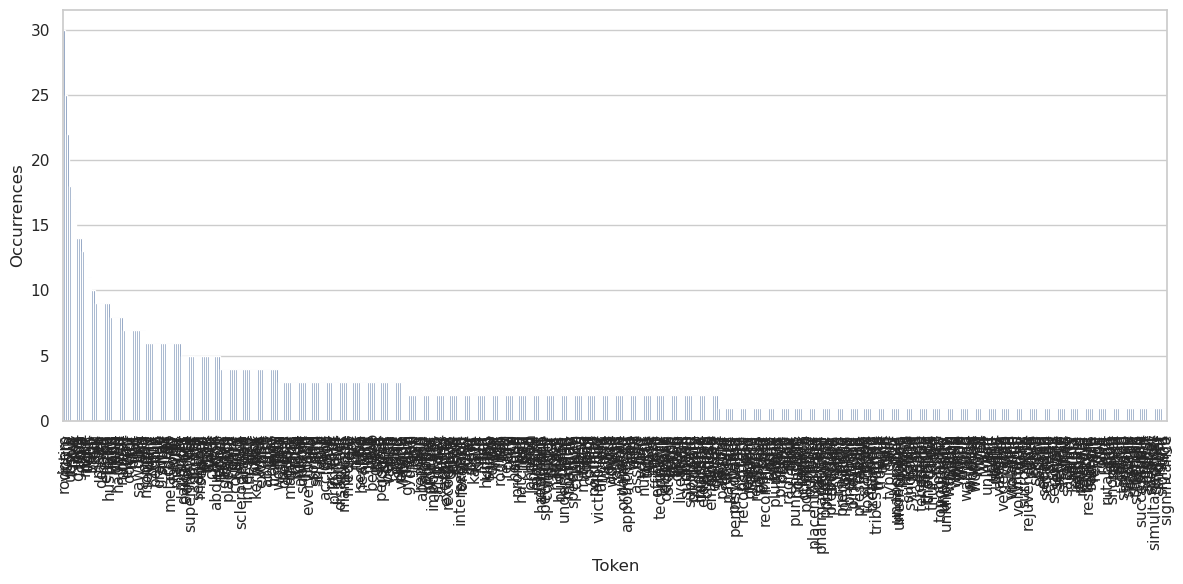

In [11]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,6))
ax = sns.barplot(x='token', y='occ', data=df_occurences_episode_2000_no_null.head(round(len(df_occurences_episode_2000_no_null)*0.6)), color='b')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
ax.set(xlabel='Token', ylabel='Occurrences')
plt.tight_layout()
plt.show()

In [12]:
del df_occurences_episode_2000_no_null
del df_occurences_episode_2000
del text_episode_2000
del vectorizer

## Tf-Idf Matrix

In [10]:
class TfIdfVect():
  
  def __init__(self, min_df, max_df, nb_episodes):
    self._vectorizer = TfidfVectorizer(strip_accents='unicode', stop_words='english', max_df=max_df, min_df=min_df)
    self._min_df = min_df
    self._max_df = max_df
    self.nb_episodes = nb_episodes
    self._path_vectorizer = f"data/pickle/tf-idf_vectorizer_min-df_{self._min_df}_max-df_{self._max_df}-{self.nb_episodes}ep.pickle"
    self._path_tf_idf_matrix = f"data/pickle/tf-idf_matrix_min-df_{self._min_df}_max-df_{self._max_df}-{self.nb_episodes}ep.pickle"
    self._path_euclidian_distance_matrix = f"data/pickle/tf-idf_euclidian_distance_matrix_min-df_{self._min_df}_max-df_{self._max_df}-{self.nb_episodes}ep.pickle"    
    self._tf_idf_matrix = None
    self._euclidian_distance_matrix = None

  def get_vectorizer(self):
    return self._vectorizer

  def get_min_df(self):
    return self._min_df

  def get_max_df(self):
    return self._max_df

  def get_vector_size(self):
    return len(self._vectorizer.vocabulary_)

  def save_vectorizer_as_file(self):
    """
    Saves the Tf-Idf vector as a file, at self._path_vectorizer.
    """
      
    os.makedirs(os.path.dirname(self._path_vectorizer), exist_ok=True)
    with open(self._path_vectorizer, 'wb') as file:
      pickle.dump(self._vectorizer, file)

  def save_tf_idf_matrix_as_file(self):
    """
    Save the Tf_Idf matrix as a file at self._path_tf_idf_matrix
    """
    if self._tf_idf_matrix is None:
      raise Exception("Please, fill the matrix before trying to save it")
      
    os.makedirs(os.path.dirname(self._path_tf_idf_matrix), exist_ok=True)
    with open(self._path_tf_idf_matrix, 'wb') as file:
      pickle.dump(self._tf_idf_matrix, file)

  def save_euclidian_distance_matrix_as_file(self):
    """
    Save the euclidian distance matrix as file at self._path_euclidian_distance_matrix
    """

    if self._euclidian_distance_matrix is None:
      raise Exception("Please, fill the euclidian distance matrix before trying to save it")
      
    os.makedirs(os.path.dirname(self._path_euclidian_distance_matrix), exist_ok=True)
    with open(self._path_euclidian_distance_matrix, 'wb') as file:
      pickle.dump(self._euclidian_distance_matrix, file)
    

  def _load_vectorizer_from_file(self):
    """
    Loads the Tf-Idf vectorizer, from self._path_vectorizer
    the function will return an error if the file doesn't exists
    """
    with open(self._path_vectorizer, 'rb') as file:
      self._vectorizer = pickle.load(file)

  def _load_tf_idf_matrix_from_file(self):
    """
    Loads the Tf-Idf Matrix, from self._path_tf_idf_matrix
    the function will return an error if the file doesn't exists
    """
    with open(self._path_tf_idf_matrix, 'rb') as file:
      self._tf_idf_matrix = pickle.load(file)

  def _load_euclidian_distance_matrix_from_file(self):
    """
    Loads the Euclidian Distance Matrix, from self._path_euclidian_distance_matrix
    the function will return an error if the file doesn't exists
    """
    with open(self._path_euclidian_distance_matrix, 'rb') as file:
      self._euclidian_distance_matrix = pickle.load(file)
  

  def fit_and_save_or_import(self, text):
    """
    Array[str] -> Int
    Fit the model and save it if there is no save of this model parameters in this computer.
    Otherwise, it loads the model from the file.
    """
  
    try:
      self._load_vectorizer_from_file()
      self._load_tf_idf_matrix_from_file()
    except:
      self._tf_idf_matrix = self._vectorizer.fit_transform(text)
      self.save_vectorizer_as_file()
      self.save_tf_idf_matrix_as_file()

  def get_euclidian_distance_matrix(self):
    """
    Returns the euclidian distance matrix. The function will load it from a file if possible
    """

    if self._euclidian_distance_matrix is None:
      try:
        self._load_euclidian_distance_matrix_from_file()
      except:
        if self._tf_idf_matrix is None:
          raise Exception("Please fill the tf_idf_matrix, before. You can use `fit_and_save_or_import()`")
        self._euclidian_distance_matrix = euclidean_distances(self._tf_idf_matrix, self._tf_idf_matrix)
        self.save_euclidian_distance_matrix_as_file()
        
    return self._euclidian_distance_matrix

> On note qu'on travaille avec près de $80 000$ épisodes, si on veut représenter une matrice avec les distances euclidiennes entre chaque épisode, nous devrions travailler avec une matrice de taille $80 000 \times 80 000$, ce qui nécéssiterais environ 45Go de RAM.

On choisis donc de travailler avec un nombre réduis d'épisode, et nous ferons par la suite une agrégation des données des épisodes, par série, afin de traiter nos données par séries.

In [12]:
nb_episodes = 20000

In [13]:
vectorizer1 = TfIdfVect(0.001, 0.1, nb_episodes)
vectorizer2 = TfIdfVect(0.001, 0.05, nb_episodes)
vectorizer3 = TfIdfVect(0.001, 0.02, nb_episodes)
vectorizer4 = TfIdfVect(0.005, 0.02, nb_episodes)
vectorizer5 = TfIdfVect(0.005, 0.05, nb_episodes)

In [14]:
texts = []

#for i in tqdm(range(min(nb_episode, len(df_paths_episodes)))):
#    path = df_paths_episodes.iloc[i]['path_lemmatized']
#    texts.append(' '.join(import_data.get_array_from_path(path)))

In [15]:
vectorizer1.fit_and_save_or_import(texts)
vectorizer2.fit_and_save_or_import(texts)
vectorizer3.fit_and_save_or_import(texts)
vectorizer4.fit_and_save_or_import(texts)
vectorizer5.fit_and_save_or_import(texts)

In [16]:
del texts

In [17]:
print("Vectorizer 1 as size", vectorizer1.get_vector_size())  
print("Vectorizer 2 as size", vectorizer2.get_vector_size())
print("Vectorizer 3 as size", vectorizer3.get_vector_size())
print("Vectorizer 4 as size", vectorizer4.get_vector_size())
print("Vectorizer 5 as size", vectorizer5.get_vector_size())

Vectorizer 1 as size 29927
Vectorizer 2 as size 28875
Vectorizer 3 as size 26524
Vectorizer 4 as size 7399
Vectorizer 5 as size 9750


In [18]:
vectorizer4._tf_idf_matrix.shape

(20000, 7399)

In [19]:
vectorizer4.get_euclidian_distance_matrix()

array([[0.        , 1.02020066, 1.23621771, ..., 1.41421356, 1.41056935,
        1.41421356],
       [1.02020066, 0.        , 1.11289649, ..., 1.41421356, 1.41421356,
        1.41421356],
       [1.23621771, 1.11289649, 0.        , ..., 1.41421356, 1.41421356,
        1.41421356],
       ...,
       [1.41421356, 1.41421356, 1.41421356, ..., 0.        , 0.95989366,
        1.16948426],
       [1.41056935, 1.41421356, 1.41421356, ..., 0.95989366, 0.        ,
        0.80963884],
       [1.41421356, 1.41421356, 1.41421356, ..., 1.16948426, 0.80963884,
        0.        ]])

In [ ]:
#plt.figure(figsize=(20, 20), dpi = 600) 
sns.heatmap(vectorizer4.get_euclidian_distance_matrix())